<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/geometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Differential (Information) Geometry**

In [3]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
print(tf.__version__)

2.2.0


# **Distance & Divergence**

**Conditions**

1. d(x, y) ≥ 0     (non-negativity)
2. d(x, y) = 0   if and only if   x = y     (identity of indiscernibles. Note that condition 1 and 2 together produce positive definiteness)
3. d(x, y) = d(y, x)     (symmetry)
4. d(x, z) ≤ d(x, y) + d(y, z)     (subadditivity / triangle inequality).

**Distances**

For continuous data:

* Euclidean Distance
* Manhattan Distance
* Canberra Distance
* Bray Curtis Distance
* Cosine Distance
* Correlation Distance

**Divergences**

* is a (contrast) function which establishes the "distance" of one probability distribution to the other on a statistical manifold. 
* divergence is a weaker notion than that of the distance, in particular the divergence need not be symmetric (that is, in general the divergence from p to q is not equal to the divergence from q to p), and need not satisfy the triangle inequality.
* The two most important divergences are the relative entropy (Kullback–Leibler divergence, KL divergence) and the squared Euclidean distance.
* Minimizing these two divergences is the main way that linear inverse problem are solved, via the principle of maximum entropy and least squares, notably in logistic regression and linear regression.
* The two most important classes of divergences are the f-divergences and Bregman divergences; however, other types of divergence functions are also encountered in the literature. The only divergence that is both an f-divergence and a Bregman divergence is the Kullback–Leibler divergence; the squared Euclidean divergence is a Bregman divergence (corresponding to the function x<sup>2</sup>), but not an f-divergence.

## **Find the similarity between two probability distributions**

Using Jensen Shannon Divergence to build a tool to find the distance between probability distributions using Python.

I was on a mission to find a good measure of difference between two probability distributions. After doing a lot of research online, taking feedback from my colleagues, and validating various methods, I found one that does a really good job.

My problem statement could be solved by calculating the statistical distance between the two probability distributions. To do this, I found out that Jensen Shannon Distance can be used.

Jensen-Shannon Divergence (JSD)is a metric derived from another measure of statistical distance called the Kullback-Leiber Divergence(KLD). The reason why I couldn’t use the KLD is that it’s an asymmetrical function. Since there might have been a lot of distance calculations required, it posed a risk.

JSD, on the other hand, is a symmetrical function and the square root of JSD gives the Jensen-Shannon Distance. A measure that we can use to find the similarity between the two probability distributions. 0 indicates that the two distributions are the same, and 1 would indicate that they are nowhere similar.

Here is the formula to calculate the Jensen-Shannon Divergence :

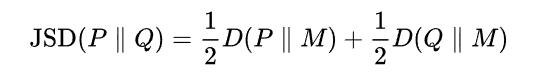

Where P & Q are the two probability distribution, M = (P+Q)/2, and D(P ||M) is the KLD between P and M. Similarly D(Q||M) is the KLD between Q and M.
Implementation in Python
Now that we know the formula, it’s time to implement it. First of all, we need to calculate M and also, the KLD between P&M and Q&M.
Scipy is a phenomenal Python Library for scientific computing and it has lots of statistical measures in-built. It turns out that the entropy measure in scipy is implemented using the KLD. Just what we want.

(I found it to be quite simple to implement it with python and I got really good results when I tested it with a few distributions.)


In [0]:
 # Create test data
p = np.random.rayleigh(3,3)
q = np.random.weibull(3,3)
p, q

(array([3.84848271, 4.18906706, 5.61567569]),
 array([1.036487  , 0.9192782 , 0.63485667]))

In [0]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
# Calculate the entropy of a distribution for given probability values
entropy([p, q], base=None)

array([0.51682914, 0.471327  , 0.32851553])

In [0]:
 m = (p + q) / 2

    # compute Jensen Shannon Divergence
divergence = (scipy.stats.entropy(p, m))

divergence

array([inf, inf, inf])

In [0]:
# Create function to compute distance
from scipy.stats import entropy
def jensen_shannon_distance(p, q):
    """
    method to compute the Jenson-Shannon Distance 
    between two probability distributions
    """

    # convert the vectors into numpy arrays in case that they aren't
    # p = np.array(p)
    # q = np.array(q)

    # calculate m
    m = (p + q) / 2

    # compute Jensen Shannon Divergence
    divergence = (scipy.stats.entropy(p, m) + scipy.stats.entropy(q, m)) / 2

    # compute the Jensen Shannon Distance
    distance = np.sqrt(divergence)

    return distance

In [0]:
print(jensen_shannon_distance(eins,zwei))

[inf inf inf]


https://en.wikipedia.org/wiki/Gromov%E2%80%93Hausdorff_convergence

# **Loss (Cost) Function**

## **Types**

**Loss Minimization**

$\min _{W}\left\{L(W):=\frac{1}{m} \sum_{i=1}^{m} \ell\left(W ; x_{i}, y_{i}\right)+\lambda r(W)\right\}$

**Mean Absolute Error**

* Computes the mean of absolute difference between labels and predictions.

**Kullback-Leibler divergence loss**

* xxx

**Sparse Categorical Crossentropy**

* xxx


# **Regularization**

## **Overfitting**

* A fundamental problem in machine learning is the possibility of overfitting training data and carrying the noise of that data through to the test set, thereby providing inaccurate generalizations. Overfitting is when you have a complicated model that gives worse predictions than a simpler model.
* Regularization is a technique for preventing a model from overfitting (e.g. preventing over-fitting by penalizing a model for having large weights).

**Regularization techniques against overfitting**

* Add more data,
* Vectornorm (L1, L2, Elastic Net) $^{1}$
* Dropout, 
* Jitter (add noise),
* Simpler model (reduce variance by taking into account fewer variables and parameters, thereby removing some of the noise in the training data), 
* Ensemble models, 
* Batch size (Small batches can oﬀer a regularizing eﬀect (Wilson and Martinez, 2003), perhaps due to the noise they add to the learning process) $^{2}$ 
* early stopping (this is not a formal regularization method, but can effectively limit overfitting). 

$^{1}$ *Traditional methods like cross-validation, stepwise regression to handle overfitting and perform feature selection work well with a small set of features but vectornorm regularization is a great alternative when dealing with a large set of features.*

$^{2}$
*Using a smaller batch size is like using some regularization to avoid converging to sharp minimizers. The gradients calculated with a small batch size are much more noisy than gradients calculated with large batch size, so it's easier for the model to escape from sharp minimizers, and thus leads to a better generalization. Generalization error is often best for a batch size of 1. Training with such a small batch size might require a small learning rate to maintain stability because of the high variance in the estimate of the gradient. The total runtime can be very high as a result of the need to make more steps, both because of the reduced learning rate and because it takes more steps to observe the entire training set.)*

**Overfitting: Variance-Bias-Tradeoff**

Generally, we refer to this model as having a large variance and a small bias. That is, the model is sensitive to the specific examples, the statistical noise, in the training dataset.

![Bias Variance Tradeoff](https://raw.githubusercontent.com/deltorobarba/repo/master/bias-and-variance.png)

Source: [Regularization and Geometry](https://towardsdatascience.com/regularization-and-geometry-c69a2365de19) & [The Bias-Variance Tradeoff
](https://towardsdatascience.com/the-bias-variance-tradeoff-8818f41e39e9)

**Benefits of regularization from a mathematical optimization point of view**

* Machine learning is an optimization problem, where we try to minimize a cost function to find optimal values for our model's parameter. Some machine learning models, like neural networks, have non-convex cost functions. Stationary points in these cost functions are problematic because numerical optimization schemes (like gradient descent) can easily get stuck, leading to poor results.
* Regularization can be used as a way of ‚convexifying‘ a non-convex cost function. The L2 regularizer, being an upward-facing convex function, can unflatten flat regions and curve up some stationary points without severely changing the minimum locations (e.g L2 regularized cost no longer has an issue with saddle points, as the region surrounding it has been curved upwards).
* Regularization can also help with the optimization of convex machine learning problems, when is not invertible. For example the solution to the L2 regularized version of linear regression is given by is the regularization parameter, which can be set large enough so that becomes invertible.

**Overfitting or Overtraining**

* [Mehmet Suzen](https://www.linkedin.com/in/mehmetsuzen/): Regularisation does not prevent overfitting or even reduces. Regularisation originally developed for reducing ill-conditioning in inverse-problems. Regularisation, along with early-stopping, cross-validation and drop out, reduces and provides a reliable measure for generalisation error. Overfitting, on the other hand, is about the 'fit' , i.e., the model complexity. In deep nets, model complexity correlates with the full architecture and the activation functions. This is called 'overtraining' ([IEEE](https://ieeexplore.ieee.org/document/623200)).
* Answer: if let it be, the learning process "will tend to learn more and more complex functions as the number of iterations increases". A model represented by a more complex function, thus having poor generalization, is an overfitting model. From the statement above, such a model can be prevented by stopping the learning early (among other techniques). Regularization is a process of applying those techniques. 

## **Vectornorm**

![Regularization Types](https://raw.githubusercontent.com/deltorobarba/repo/master/vectornorm.jpeg)

Source: ['Getting started with Regression'](https://medium.com/@savannahar68/getting-started-with-regression-a39aca03b75f)

**Theoretical Foundation** 

Modify cost function J by adding 'preference' to certain parameter values:

$J(\underline{\theta})=\frac{1}{2}\left(\underline{y}-\underline{\theta} \underline{X}^{T}\right) \cdot\left(\underline{y}-\underline{\theta} \underline{X}^{T}\right)^{T}+\alpha \theta \theta^{T}$

New solution (derive the same way) - problem is now well-posed for any degree:

$\underline{\theta}=\underline{y} \underline{X}\left(\underline{X}^{T} \underline{X}+\alpha I\right)^{-1}$

* Shrinks parameters towards zero
* Alpha large: we prefer small theta to small MSE
* Regularization term is independent of the data: paying more attention reduces variance.

**Lambda Value (λ)**

* Lambda is a regularization hyperparameter
* Reasonable values of lambda range between 0 and 0.1
* L2 weight regularization with very small regularization hyperparameters such as (e.g. 0.0005 or 5 x 10^−4) may be a good starting point
* Learn more: [Google Course: Regularization for Simplicity: Lambda](https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/lambda)

**L1 Regularization**

<p>
$\sum_{i=1}^{n}\left|u_{i}\right|=\sum_{i=1}^{n}\left|y_{i}-b_{0}-b_{1} x_{i}\right|$
</p><br>


$d_{1} \equiv d_{\mathrm{SAD}}:(x, y) \mapsto\|x-y\|_{1}=\sum_{i=1}^{n}\left|x_{i}-y_{i}\right|$

* **Synonyms**: Lasso, Manhatten distance, least absolute deviations (LAD method), least absolute errors (LAE)
* **Fun Fact**: L1 Regularization is analytical equivalent to Laplacean prior
* **Summary**: Sum of the absolute weights. Gives sparse solutions, since it does not take all features. Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.
* **Advantages**: less influenced by outliers (robust). Can shrink some coefficients to zero while lambda increases, performing variable selection. generates sparse feature vectors (Sparse: only very few entries in a matrix or vector is non-zero. L1-norm has property of producing many coefficients with zero values or very small values with few large coefficients). Sparse is sometimes good eg. in high dimensional classification problems. sparsity properties: calculation more computationally efficient.
* **Disadvantages**: L1 regularization doesn’t easily work with all forms of training. gives a solution with more large residuals, and a lot of zeros in the solution.
* **Use Cases**: if only a subset of features are correlated with the label, as in lasso model some coefficient can be shrunken to zero. very useful when you want to understand exactly which features are contributing to a decision. if you can ignore the ouliers in your dataset or you need them to be there. use L1 when constraints on feature extraction: easily avoid computing a lot of computationally expensive features  at the cost of some of the accuracy, since the L1-norm will give us a solution which has the weights for a large set of features set to zero (real-time detection or tracking of an object/face/material using a set of diverse handcrafted features with a large margin classifier like an SVM in a sliding window fashion - you'd probably want feature computation to be as fast as possible in this case).
* **Bayesian**: L1 usually corresponds to setting a Laplacean prior: Some of the coefficients will shrink to zero: similar effect would be achieved in Bayesian linear regression using a Laplacian prior (strongly peaked at zero) on each of the beta coefficients.



**Add L1 (Lasso) Penalty Term to Cost Function**

$\sum_{i=1}^{n}\left(Y_{i}-\sum_{j=1}^{p} X_{i j} \beta_{j}\right)^{2}+\lambda \sum_{j=1}^{p}\left|\beta_{j}\right|$

* Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.
* If lambda is zero then we will get back OLS whereas very large value will make coefficients zero hence it will under-fit.

**L2 Regularization**

<p>
$\sum_{i=1}^{n} u_{i}^{2}=\sum_{i=1}^{n}\left(y_{i}-b_{0}-b_{1} x_{i}\right)^{2}$
</p><br>

* **Synonyms**: Weight Decay, Ridge Regression, KQ-Methode, kleinste Quadrate, [Tikhonov regularization](https://en.m.wikipedia.org/wiki/Tikhonov_regularization), Euclidean distance, least squares error (LSE)
* **Fun Fact**: L2 Regularization is analytically equivalent to Gaussian prior
* **Summary**: Sum of the squared weights. Is the most common type of regularization, also called simply “weight decay,” with values often on a logarithmic scale between 0 and 0.1, such as 0.1, 0.001, 0.0001, etc.
* **Advantages**: Shrinks all the coefficient by the same proportions, but eliminates none. Leads to small distributed weights in neural networks. The L2 regularization heavily penalizes "peaky" weight vectors and prefers diffuse weight vectors. Empirically performs better than L1. The fit for L2 will be more precise than L1. Works with all forms of training. Smoother: fewer large residual values along with fewer very small residuals as well. L2-norm has analytical solution - allows the L2-norm solutions to be calculated computationally efficiently.
* **Disadvantages**: Sensitive to outliers, since L2 wants all errors to be tiny and heavily penalizes anyone who doesn't obey. Computation heavy compared to the L1 norm. Doesn’t give you implicit feature selection.
* **Use Cases**: Use ridge if all the features are correlated with the label, as the coefficients are never zero in ridge. 
* **Bayesian**: L2 similarly corresponds to Gaussian prior. As one moves away from zero, the probability for such a coefficient grows progressively smaller. The square loss penalty can be seen as putting a Gaussian prior on your weights.


**Add L2 (Ridge) Penalty Term to Cost Function**

$\sum_{i=1}^{n}\left(y_{i}-\sum_{j=1}^{p} x_{i j} \beta_{j}\right)^{2}+\lambda \sum_{j=1}^{p} \beta_{j}^{2}$

* Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function.
* If lambda is zero then you can imagine we get back OLS. However, if lambda is very large then it will add too much weight and it will lead to under-fitting. Having said that it’s important how lambda is chosen.

**Elastic Net**

* Method that linearly combines the L1 and L2 penalties of the lasso and ridge methods, at the "only" cost of introducing another hyperparameter to tune (see Hastie's paper on stanford.edu).
* Overcome limitations of L1: in the "large p, small n" case (high-dimensional data with few examples), the LASSO selects at most n variables before it saturates. Also if there is a group of highly correlated variables, then the LASSO tends to select one variable from a group and ignore the others.
* Solution in elastic net: add quadratic part to penalty (L2). quadratic penalty term makes the loss function strictly convex, and it therefore has a unique minimum.
* Naive version of elastic net method finds an estimator in a two-stage procedure : first for each fixed λ2 it finds the ridge regression coefficients, and then does a LASSO type shrinkage. This kind of estimation incurs a double amount of shrinkage, which leads to increased bias and poor predictions. To improve the prediction performance, the authors rescale the coefficients of the naive version of elastic net by multiplying the estimated coefficients by (1+λ2).

**Special: Analytical Equivalence**

Why is L2 Regularization is analytically equivalent to Gaussian prior?


https://stats.stackexchange.com/questions/163388/why-is-the-l2-regularization-equivalent-to-gaussian-prior/163450#163450


**Weight Regularization**

* Weight regularization was borrowed from penalized regression models in statistics. Neural networks learn a set of weights that best map inputs to outputs. 
* A network with large network weights can be a sign of an unstable network where small changes in the input can lead to large changes in the output. This can be a sign that the network has overfit the training dataset and will likely perform poorly when making predictions on new data. 
* A solution to this problem is to update the learning algorithm to encourage the network to keep the weights small. This is called weight regularization and it can be used as a general technique to reduce overfitting of the training dataset and improve the generalization of the model.


## **Dropout**

**What is it and how it works?**

* Ziel: Overfitting vermeiden
* Dropout forces a neural network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.
* Dropout roughly doubles the number of iterations required to converge. However, training time for each epoch is less. With H hidden units, each of which can be dropped, we have 2^H possible models. In testing phase, the entire network is considered and each activation is reduced by a factor p.
At test time the whole network is used (all units) but with scaled down weights. Mathematically this approximates ensemble averaging (using the geometric mean as average). Two papers that explain this much better are:
* Hinton et al, [1207.0580] Improving neural networks by preventing co-adaptation of feature detectors, 2012 (probably the original paper on dropout)
* Warde-Farley et al, [1312.6197] An empirical analysis of dropout in piecewise linear networks, 2014 (analyzes dropout specially for the case of using ReLU as activation function -arguably the most popular- , and checks the behavior of the geometric mean for ensemble averaging).
* Andrew Ng: dropout is nothing more than an adaptive form of L2 regularization and that both methods have similar effects
* The dropout will randomly mute some neurons in the neural network and we therefore have a sparse network which hugely decreases the possibility of overfitting. More importantly, the dropout will make the weights spread over the input features instead of focusing on some features. https://hackernoon.com/is-the-braess-paradox-related-to-dropout-in-neural-nets-270ecb97cdeb https://de.m.wikipedia.org/wiki/Dropout_(künstliches_neuronales_Netz)

**Is dropout outdated?**

Neural Network:  Dropout

https://medium.com/@bingobee01/a-review-of-dropout-as-applied-to-rnns-72e79ecd5b7b

Don’t Use Dropout in Convolutional Networks
https://towardsdatascience.com/dont-use-dropout-in-convolutional-networks-81486c823c16

Instead you should insert batch normalization between your convolutions. This will regularize your model, as well as make your model more stable during training.

First, dropout is generally less effective at regularizing convolutional layers: The reason? Since convolutional layers have few parameters, they need less regularization to begin with. Furthermore, because of the spatial relationships encoded in feature maps, activations can become highly correlated. This renders dropout ineffective. ([Source](https://www.reddit.com/r/MachineLearning/comments/5l3f1c/d_what_happened_to_dropout/))

Second, what dropout is good at regularizing is becoming outdated: Large models like VGG16 included fully connected layers at the end of the network. For models like this, overfitting was combatted by including dropout between fully connected layers. Unfortunately, [recent architectures](https://arxiv.org/pdf/1512.03385.pdf) move away from this fully-connected block. By replacing dense layers with global average pooling, modern convnets have reduced model size while improving performance.

**Use Dropout along with L1/L2 Regularization?**

* You can, but it is still not clear whether using both at the same time acts synergistically or rather makes things more complicated for no net gain.
* While ℓ 2 regularization is implemented with a clearly-defined penalty term, dropout requires a random process of “switching off” some units, which cannot be coherently expressed as a penalty term and therefore cannot be analyzed other than experimentally.
* they both try to avoid the network’s over-reliance on spurious correlations, which are one of the consequences of overtraining that wreaks havoc with generalization. But more detailed research is necessary to determine whether and when they can “work together” or rather end up “fighting each other”. So far, it seems the results tend to vary in a case-by-case fashion. Using both can increase accuracy: https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf (Hinton paper 2014) 

# **Activation Function**

![Optimizer](https://raw.githubusercontent.com/deltorobarba/repo/master/optimizer_3.png)

## **Run an Example**

**Load & Transform Data**

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

**Kernel Regularizer**

*Regularizer function applied to the kernel weights matrix.*

In [0]:
kernel_regularizer=tf.keras.regularizers.l1(l=0.0005)

In [0]:
kernel_regularizer=tf.keras.regularizers.l2(l=0.0005)

In [0]:
kernel_regularizer=None

**Bias Regularizer**

*Regularizer function applied to the bias vector*

In [0]:
bias_regularizer=tf.keras.regularizers.l1(l=0.0005)

In [0]:
bias_regularizer=tf.keras.regularizers.l2(l=0.0005)

In [0]:
bias_regularizer=None

**Activity Regularizer**

*Regularizer function applied to the output of the layer (its "activation")*

In [0]:
activity_regularizer=tf.keras.regularizers.l1(l=0.0005)

In [0]:
activity_regularizer=tf.keras.regularizers.l2(l=0.0005)

In [0]:
activity_regularizer=None

**Select Dropout Rate**

In [0]:
dropout = 0.3

**Select Loss ([Cost Function](https://www.tensorflow.org/api_docs/python/tf/keras/losses/))**

In [0]:
loss = 'sparse_categorical_crossentropy'

In [0]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
loss = 'mae'

**Select Activation function**

* activation function als Dense parameter. 
* activation layer als eigener layer.
* keras.activation = functions
keras.layers = layers

In [0]:
activation = tf.keras.activations.tanh

In [0]:
activation = tf.keras.activations.sigmoid

In [0]:
activation = tf.keras.layers.ReLU(max_value=None,
                                 negative_slope=0,
                                 threshold=0)

In [0]:
activation = tf.keras.layers.LeakyReLU(alpha=0.3)

In [0]:
activation = tf.keras.layers.Softmax(axis=-1)

In [0]:
# Alternatively add default settings

activation = 'relu'
# activation = 'linear'
# activation = 'sigmoid'
# activation = 'tanh'
# activation = 'softmax'

**Define Model & Run**

In [0]:
!pip install livelossplot --quiet
from livelossplot import PlotLossesKerasTF

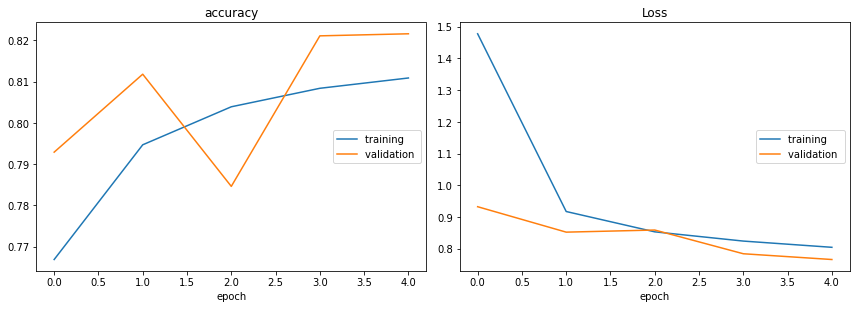

accuracy
	training         	 (min:    0.767, max:    0.811, cur:    0.811)
	validation       	 (min:    0.785, max:    0.822, cur:    0.822)
Loss
	training         	 (min:    0.804, max:    1.514, cur:    0.804)
	validation       	 (min:    0.766, max:    0.978, cur:    0.766)
1875/1875 [==============================] - 10s 6ms/step - loss: 0.8043 - accuracy: 0.8109 - val_loss: 0.7658 - val_accuracy: 0.8216


In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation='relu', 
                                kernel_regularizer=kernel_regularizer, 
                                bias_regularizer=bias_regularizer, 
                                activity_regularizer=activity_regularizer))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', 
              loss=loss, 
              metrics=['accuracy'])
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKerasTF()],
          verbose=1)

# **Activation Function**

## **Overview**

![Activation Function](https://raw.githubusercontent.com/deltorobarba/repo/master/activation.png)

* The activation function is the non-linear function that we apply over the output data coming out of a particular layer of neurons before it propagates as the input to the next layer.
* Activation functions reside within neurons and transform input values into acceptable and useful range. They can introduce non-linearity to a network.
* There are various kinds of activation functions and it has been found, empirically, that some of them works better for large datasets or particular problems than the others. 
* Neural networks extract hidden pattern from a dataset by observing given examples of known answers. Evidently, it does so by comparing its predictions to the ground truth (labeled images for example) and turning the parameters of the model. The difference between the prediction and the ground truth is called the ‘classification error’.
* Parameters of a DL model consists of a set of weights connecting neurons across layers and bias terms which add to those layers. So, the ultimate goal is to set those weights to specific values which reduces the overall classification error. This is a minimization operation, and consequently, an optimization technique is needed.
* The overall representation structure of a deep learning model is a highly complex nonlinear function and therefore, the optimizer is responsible for minimizing the error produced by the evaluation of this complex function. Therefore, standard optimization like linear programming does not work for DL models and innovative nonlinear optimization must be used.
* These two components – **activation functions** and **nonlinear optimizers** – are at the core of every deep learning architecture. However, there is considerable variety in the specifics of these components.



**Necessary Characteristics of Activation Function**

Activation functions must be:

1. Non-constant (obvious)
2. Bounded
3. Monotonically increasing
4. Continuous

These are the conditions under which the universal approximation theorem holds. The universal approximation theorem proves that, under the above conditions, any continuous function of N-variables defined on a compact subset of R^N can be approximated by a three- layer (input, hidden layer, output) neural network with that activation function.

The universal approximation theorem is certainly one of the most rigorous tenets of neural networks.

Of course, if the prediction problem at hand does not deal with continuous variables or cannot be approximated by a problem that does, then the above is no longer valid and the choice of activation functions becomes more of a customized problem.

**Selection Criteria**

Activation layers are a type of hyperparameter, and you’ll need to experiment with all of them in order to find which works best for you. You can narrow your search by referring to prior work in the field for your particular problem. For example, it has already been shown that tanh activations work better for image classification while leaky ReLUs work better for temporal sequences such as video.

![Optimizer](https://raw.githubusercontent.com/deltorobarba/repo/master/optimizer_1.png)

Sources: [Stanford.edu](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning) & [Deep Dive into Math Behind Deep Networks](https://towardsdatascience.com/https-medium-com-piotr-skalski92-deep-dive-into-deep-networks-math-17660bc376ba)

## **Types**

**Sigmoid Family**

Im Allgemeinen ist eine Sigmoidfunktion eine beschränkte und differenzierbare reelle Funktion mit einer durchweg positiven oder durchweg negativen ersten Ableitung und genau einem Wendepunkt.

Außer der logistischen Funktion enthält die Menge der Sigmoidfunktionen den Arkustangens, den Tangens hyperbolicus und die Fehlerfunktion, die sämtlich transzendent sind, aber auch einfache algebraische Funktionen. 

Das Integral jeder stetigen, positiven Funktion mit einem „Berg“ (genauer: mit genau einem lokalen Maximum und keinem lokalen Minimum, z. B. die gaußsche Glockenkurve) ist ebenfalls eine Sigmoidfunktion. Daher sind viele kumulierte Verteilungsfunktionen sigmoidal.

![Sigmoidfunktionen](https://raw.githubusercontent.com/deltorobarba/repo/master/sigmoidfunktionen.jpg)

**Logistic Regression ('Sigmoid')**

$g(z)=\frac{1}{1+e^{-z}}$

<br> 
**Characteristics**
* Logistic regression. Takes a real-valued number as an input and compresses all its outputs to the range of [0,1]. Sigmoid only for binary classification output layer.
* Sigmoid activation derived from mean field solution of Boltzmann machine
* Softmax function is a more generalized logistic activation function which is used for multiclass classification.

**Advantages**
* In the logistic function, a small change in the input only causes a small change in the output as opposed to the stepped output. Hence, the output is smoother than the step function output.
* Historically popular since they have nice interpretation as a saturating “firing rate” of a neuron.
* The function is differentiable.That means, we can find the slope of the sigmoid curve at any two points.
* Especially used for models where we have to predict the probability as an output (of a binary problem).
* Sigmoid works well for a classifier: approximating a classifier function as combinations of sigmoid is easier than maybe ReLu, for example. Which will lead to faster training process and convergence

**Disadvantages**
* exp() is a bit compute expensive. Learning time longer. Also other functions have been shown to produce the same performance with less iterations. Additionally: small local gradients can mute the gradient and disallow the forward propagation of a useful signal.
* The sigmoid function is monotonic but function’s derivative is not: the tails of the first derivative of a Sigmoid are near zero (covariate shift), which lead to vanishing or exploding gradient. Incorrect weight initialization can lead to saturation, where most neurons of the network then become saturated and almost no learning will take place. Saturated neurons “kill” the gradients (look at x= -10, 0 and 10). Can cause the neural network to get stuck during training. If a strongly-negative input is provided to the logistic sigmoid, it outputs values very near zero. Since neural networks usethe feed-forward activations to calculate parameter gradients, this can result in model parameters that are updated less regularly than we would like, and are thus “stuck” in their current state (this problem can be solved if we normalize the data in advance to be zero-centered as in batch/layer normalization).
* Sigmoid outputs are not zero-centered. Neurons in later layers of processing in a neural net would be receiving data that is not zero-centered. If data coming into is always positive, the gradient on the weights 𝑤 will during backpropagation become either all be positive, or all negative. This could introduce undesirable zig-zagging dynamics in the gradient updates for the weights. (However, notice that once these gradients are added up across a batch of data the final update for the weights can have variable signs, somewhat mitigating this issue. Therefore, this is an inconvenience but it has less severe consequences compared to the saturated activation problem.)

*Example: there are two parameter w1 and w 2; f the gradients of two dimensions are always of the same sign, it means we can only move roughly in the direction of northeast or southwest in the parameter space. If our goal happens to be in the northeast, we can only move in a zig-zagging fashion to get there, just like parallel parking in a narrow space.*

In [0]:
sns.set(rc={'figure.figsize':(7, 4)})

# Increasing weight size or input scale will form function steeper
weight_size = 1
input_scale_upper = 10
input_scale_lower = -10
resolution = 100

x = np.linspace(input_scale_lower, input_scale_upper, resolution) 
z = 1/(1 + np.exp(-(weight_size)*x)) 
  
plt.plot(x, z), plt.xlabel("x"), plt.ylabel("Sigmoid(X)") 
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show() 

**tanh ((hyperbolic tangent)**

$g(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$

* LeCun et al., 1991
* The tanh function "squashes" values to the range -1 and 1. Output values are, therefore, centered around zero. Can be thought of as a scaled, or shifted, sigmoid, and is almost always preferable to the sigmoid function
* Squashes numbers to range [-1,1]
* zero centered (nice)
* The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.
* The function is differentiable.
* The function is monotonic while its derivative is not monotonic.
* The tanh function is mainly used classification between two classes.
* still kills gradients when saturated

In [0]:
x = np.linspace(-10, 10, 100) 
z = (np.tanh(x)) 
  
plt.plot(x, z), plt.xlabel("x"), plt.ylabel("tanh") 
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show()

**Softmax**

* is an activation function that is not function of a single fold x from the previous layer or layers.
* usually used in the last layer
* Softmax Regression (synonyms: Multinomial Logistic, Maximum Entropy Classifier, or just Multi-class Logistic Regression) 
* is a generalization of logistic regression that we can use for multi-class classification (under the assumption that the classes are mutually exclusive). We use the (standard) Logistic Regression model in binary classification tasks. in softmax regression (SMR), we replace the sigmoid logistic function by the so-called€softmax function€φ

In [0]:
x = np.arange(-5, 5, 0.1)
plt.plot(np.exp(x) / np.sum(np.exp(x)))

**Custom Sigmoid**

In [0]:
# Weibull - Cumulative Distribution Function
sns.set(rc={'figure.figsize':(4, 4)})
x = np.linspace(0, 25, 10000) 
shape = 5 # k
scale = 1 # λ
# Simple: z = 1 - (np.exp(-(x/λ)**k))
z = scipy.stats.weibull_min.cdf(x, c=shape, scale=scale)

plt.title('Weibull Distribution')
plt.plot(x, z)
plt.show(xlim(0,2))

In [0]:
# Rayleigh Distribution
sns.set(rc={'figure.figsize':(4, 4)})
x = np.linspace(0, 25, 10000) 
σ = 0.3
z = 1 - (np.exp((-x**2)/(2*σ**2)))

plt.plot(x, z)
# plt.title('Rayleigh Distribution')
plt.show(xlim(0,2)) 

In [0]:
# Distribution fitting against Rayleigh

from scipy.stats import norm,rayleigh
samp = rayleigh.rvs(loc=5,scale=2,size=150) # samples generation
param = rayleigh.fit(samp) # distribution fitting

x = linspace(5,13,100)
# fitted distribution
pdf_fitted = rayleigh.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = rayleigh.pdf(x,loc=5,scale=2)

title('Rayleigh distribution')
plot(x,pdf_fitted,'r-',x,pdf,'b-')
hist(samp,normed=1,alpha=.3)
show()

**Rectifier Functions Family**

https://en.m.wikipedia.org/wiki/Rectifier_(neural_networks)

**Advantages**
* Biological plausibility: One-sided, compared to the antisymmetry of tanh.
* Sparse activation: For example, in a randomly initialized network, only about 50% of hidden units are activated (having a non-zero output).
* Better gradient propagation: Fewer vanishing gradient problems compared to sigmoidal activation functions that saturate in both directions.
* Efficient computation: Only comparison, addition and multiplication.
* Scale-invariant: 


**Disadvantages**
* Non-differentiable at zero; however, it is differentiable anywhere else, and the value of the derivative at zero can be arbitrarily chosen to be 0 or 1.
* Not zero-centered.
* Unbounded.
* Dying ReLU problem: ReLU neurons can sometimes be pushed into states in which they become inactive for essentially all inputs. In this state, no gradients flow backward through the neuron, and so the neuron becomes stuck in a perpetually inactive state and "dies". This is a form of the vanishing gradient problem. In some cases, large numbers of neurons in a network can become stuck in dead states, effectively decreasing the model capacity. This problem typically arises when the learning rate is set too high. It may be mitigated by using leaky ReLUs instead, which assign a small positive slope for x < 0

**ReLU (Rectified Linear Unit)**

$g(z)=\max (0, z)$

<br>

Transformation leads positive values to be 1, and negative values to be zero. Shown to accelerate convergence of gradient descent compared to above functions. Can lead to neuron death, which can be combated using Leaky ReLU modification (see [1]). ReLU is has become the default activation function for hidden layers (see [3])

**Characteristics**
* Krizhevsky et al., 2012
* rectified linear units, faster and more efficient, since fewer neurons are activated (less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations). 
* No gradient vanishing problem, as Relu’s gradient is constant = 1. Sparsity: since output 0 for negative values of x! When W*x < 0, Relu gives 0, which means sparsity. Less calculation load. This may be least important. 
* However, ReLu may amplify the signal inside the network more than softmax and sigmoid. 
* But: dying ReLU problem for values zero and smaller: neurons will never reactivated. Solution: leaky ReLU, noisy ReLU (in RBMs) and ELU (exponential linear units)
* ReLU as the activation function for hidden layers and sigmoid for the output layer (these are standards, didn’t experiment much on changing these). Also, I used the standard categorical cross-entropy loss.

**Advantages**
* Does not saturate (in +region)
* Very computationally efficient
* Converges much faster than sigmoid/tanh in practice (e.g. 6x)
Actually more biologically plausible than sigmoid

**Disadvantages**
* Not zero-centered output
* An annoyance: what is the gradient when x < 0? What happens when x = -10, 0 or 10?
* People like to initialize ReLU neurons with slightly positive biases (e.g. 0.01)



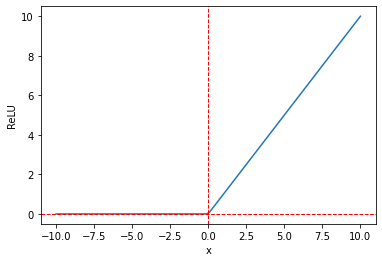

In [11]:
x = np.linspace(-10, 10, 100) 
z = (np.maximum(0, x))
  
plt.plot(x, z), plt.xlabel("x"), plt.ylabel("ReLU") 
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show()

**Leaky ReLU**

$\begin{aligned}
g(z) &=\max (\epsilon z, z) \\
& \text { with } \epsilon \ll 1
\end{aligned}$

* Mass et al., 2013 and He et al., 2015
* Leaky ReLUs allow a small, positive gradient when the unit is not active
* Does not saturate
* Computationally efficient
* Converges much faster than sigmoid/tanh in practice! (e.g. 6x) will not “die”.z = np.arange(-55, 5, 1)
plt.plot(np.maximum(0.01 * z, z))

In [0]:
z = np.arange(-55, 5, 1)
plt.plot(np.maximum(0.01 * z, z))

**ELU**

* Exponential Linear Units
* Clevert et al., 2015
* All benefits of ReLU
* Closer to zero mean outputs
* Negative saturation regime compared with Leaky ReLU adds some robustness to noise 
* But Computation requires exp()

**Swish**

* Google Brain 2017
* Variant of ReLU

https://medium.com/@jaiyamsharma/experiments-with-swish-activation-function-on-mnist-dataset-fc89a8c79ff7

https://medium.com/@neuralnets/swish-activation-function-by-google-53e1ea86f820

https://www.machinecurve.com/index.php/2019/05/30/why-swish-could-perform-better-than-relu/



In [0]:
x = np.arange(-10, 10, 0.1)
plt.xlabel('x'), plt.ylabel('f(x)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
beta = 1.0
# plt.plot(x * (1 / (1 + np.exp(-x))))
plt.plot(x * ((1 / (1 + np.exp(-x))) * (beta * x)))

**SeLU**

* scaled exponential linear units
* instead of normalizing the output of the activation function — the activation function suggested (SELU — scaled exponential linear units) outputs normalized values. https://towardsdatascience.com/selu-make-fnns-great-again-snn-8d61526802a9
* Background: batchnormalization for feedfirward networks: Training Deep Neural Networks is complicated by the fact that the distribution of each layer's inputs changes during training, as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities. (https://arxiv.org/abs/1502.03167)
* Negative values sometimes: Scaling the function is the mechanism by which the authors accomplish the goal (of self-normalizing properties). As a byproduct, they sometimes output negative values, but there's no hidden meaning in it. It just makes the math work out. 
* **SELU vs RELU**: https://www.hardikp.com/2017/07/24/SELU-vs-RELU/